<a href="https://colab.research.google.com/github/baussel/Satellite_Detection/blob/main/Zooniverse_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zoniverse Data Transformation



---


*Ben Aussel, August 2021, ESA*


---



In [3]:
#Mount Google Drive with this Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Modules
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
import glob
import json
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Image IDs from Zooniverse

In [4]:
data_image_ids = pd.read_csv("/content/drive/MyDrive/ESA/Data/Zooniverse_Data/csv/image_ids.csv")

In [5]:
def get_image_filename(id):
    """ Gets the index of the row with matching subject_id. 
        Return the corresponding filename from the metadata column
        (casted to a dictionary).
    """
    index_id = data_image_ids.index[data_image_ids["subject_id"] == id][0]
    dict_ids = json.loads(data_image_ids["metadata"][index_id])
    return dict_ids["filename"]

In [6]:
print(get_image_filename(64994406))

iedh49010_iedh49kuq.jpg


In [7]:
def get_image_id(filename):
    """ Gets the Zooniverse subject_id from given filename"""
    for index, row in data_image_ids.iterrows():
        dict_ids = json.loads(data_image_ids["metadata"][index])
        if dict_ids["filename"] == filename: break
        else: continue
    return data_image_ids["subject_id"][index]

In [8]:
print(get_image_id("jdrz67010_jdrz67meq.jpg"))

65115172


In [9]:
def get_instrument_name(filename):
    for index, row in data_image_ids.iterrows():
        dict_ids = json.loads(data_image_ids["metadata"][index])
        if dict_ids["filename"] == filename: break
        else: continue
    return dict_ids["Instrument Name"]

In [10]:
print(get_instrument_name("jds44i010_jds44isfq.jpg"))

ACS/WFC


## Questions - Satellite: Yes or no

In [43]:
data_questions = pd.read_csv("/content/drive/MyDrive/ESA/Data/Zooniverse_Data/csv/question_reducer_reductions.csv")

In [44]:
#Minimum number of people (from 10) to classify as satellite
min_class = 4

In [45]:
#At least one satellite
indices_t0 = data_questions.index[data_questions["task"] == "T0"].tolist()
print(len(indices_t0),"answered first question. Is there a satellite?")
images_satellite = []
images_no_satellite = []
for i in range(len(indices_t0)):
    try:
        filename = get_image_filename(data_questions["subject_id"][indices_t0[i]])  
    except:
        continue
    try: 
        number = int(data_questions["data.yes"][indices_t0[i]])
    except: 
        number = 0
    if number > min_class:
        images_satellite.append(filename)
    else:
        images_no_satellite.append(filename)
print("There are",len(images_satellite),"images with at least one satellite trail.")
print("There are",len(images_no_satellite),"images without satellite trails.")
print("-->",len(indices_t0)-len(images_satellite)-len(images_no_satellite),"images not found.")

11595 answered first question. Is there a satellite?
There are 2827 images with at least one satellite trail.
There are 8454 images without satellite trails.
--> 314 images not found.


In [46]:
images_satellite.index("jdkk01010_jdkk01n4q.jpg")

814

In [47]:
#At least two satellites
indices_t3 = data_questions.index[data_questions["task"] == "T3"].tolist()
print(len(indices_t3),"answered second question. Is there another satellite?")
images_satellite_2 = []
images_no_satellite_2 = []
for i in range(len(indices_t3)):
    try:
        filename = get_image_filename(data_questions["subject_id"][indices_t3[i]])  
    except:
        continue
    try: 
        number = int(data_questions["data.yes"][indices_t3[i]])
    except: 
        number = 0
    if number > min_class:
        images_satellite_2.append(filename)
    else:
        images_no_satellite_2.append(filename)
print("There are",len(images_satellite_2),"images with at least two satellite trails.")
print("There are",len(images_no_satellite_2),"images with less than two satellite trails.")
print("-->",len(indices_t3)-len(images_satellite_2)-len(images_no_satellite_2),"images not found.")

11595 answered second question. Is there another satellite?
There are 142 images with at least two satellite trails.
There are 11139 images with less than two satellite trails.
--> 314 images not found.


In [48]:
#At least three satellites
indices_t6 = data_questions.index[data_questions["task"] == "T6"].tolist()
print(len(indices_t6),"answered third question. Is there another satellite?")
images_satellite_3 = []
images_no_satellite_3 = []
for i in range(len(indices_t6)):
    try:
        filename = get_image_filename(data_questions["subject_id"][indices_t6[i]])  
    except:
        continue
    try: 
        number = int(data_questions["data.yes"][indices_t6[i]])
    except: 
        number = 0
    if number > min_class:
        images_satellite_3.append(filename)
    else:
        images_no_satellite_3.append(filename)
print("There are",len(images_satellite_3),"images with at least three satellite trails.")
print("There are",len(images_no_satellite_3),"images with less than three satellite trails.")
print("-->",len(indices_t6)-len(images_satellite_3)-len(images_no_satellite_3),"images not found.")

11595 answered third question. Is there another satellite?
There are 11 images with at least three satellite trails.
There are 11270 images with less than three satellite trails.
--> 314 images not found.


In [49]:
#At least four satellites
indices_t9 = data_questions.index[data_questions["task"] == "T9"].tolist()
print(len(indices_t9),"answered fourth question. Is there another satellite?")
images_satellite_4 = []
images_no_satellite_4 = []
for i in range(len(indices_t9)):
    try:
        filename = get_image_filename(data_questions["subject_id"][indices_t9[i]])  
    except:
        continue
    try: 
        number = int(data_questions["data.yes"][indices_t9[i]])
    except: 
        number = 0
    if number > min_class:
        images_satellite_4.append(filename)
    else:
        images_no_satellite_4.append(filename)
print("There are",len(images_satellite_4),"images with at least four satellite trails.")
print("There are",len(images_no_satellite_4),"images with less than four satellite trails.")
print("-->",len(indices_t9)-len(images_satellite_4)-len(images_no_satellite_4),"images not found.")

11595 answered fourth question. Is there another satellite?
There are 2 images with at least four satellite trails.
There are 11279 images with less than four satellite trails.
--> 314 images not found.


In [50]:
print("Images with at least four trails:",images_satellite_4)

Images with at least four trails: ['jdrz67010_jdrz67meq.jpg', 'jbyi02010_jbyi02stq.jpg']


In [51]:
def copy_pathes(instrument):
    if instrument == "ACS/WFC":
        from_folder = "ACS_Comp_Raw/"
        to_folder = "Visible/"
    elif instrument == "WFC3/UVIS":
        from_folder = "WFC3_UVIS_Comp_Raw/"
        to_folder = "Visible/"
    elif instrument == "WFC3/IR":
        from_folder = "WFC3_IR_Comp_Raw/"
        to_folder = "IR/"
    else:
        print("WRONG INSTRUMENT. Skip Image.")
        return "",""
    return from_folder,to_folder

### Copy in Training directory

In [ ]:
path_from = "/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/"
path_to = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/Images/"
#Satellites
for i in tqdm(range(len(images_satellite))):
    instrument = get_instrument_name(images_satellite[i])
    from_folder, to_folder = copy_pathes(instrument)
    try:
        copyfile(path_from+from_folder+images_satellite[i],path_to+to_folder+"satellite/"+images_satellite[i])
    except:
        print("Copy Error.")

#No Satellites
for i in tqdm(range(len(images_no_satellite))):
    instrument = get_instrument_name(images_no_satellite[i])
    from_folder, to_folder = copy_pathes(instrument)
    try:
        copyfile(path_from+from_folder+images_no_satellite[i],path_to+to_folder+"no_satellite/"+images_no_satellite[i])
    except:
        print("Copy Error.")

##### Check for corrupt images

In [ ]:
#Check for corrupt images
#(Source: https://stackoverflow.com/questions/62586443/tensorflow-error-when-trying-transfer-learning-invalid-jpeg-data-or-crop-windo) 
from struct import unpack
import os
import glob
from tqdm import tqdm

marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"}

class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break        

bads = []
images = glob.glob(image_path+"*/*.jpg")

for img in tqdm(images):
  image = img
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bads.append(img)

100%|██████████| 10419/10419 [12:54<00:00, 13.45it/s]


In [ ]:
print(bads)

['/content/drive/MyDrive/ESA/Data/Zooniverse_Data/Images/Visible/satellite/jbew0h020_jbew0hk3q.jpg']


#### Delete fraction of images for balanced Dataset

In [ ]:
#Calculate distribution of images
factor = int(np.round(len(images_no_satellite)/len(images_satellite)))
print("There are circa",factor,"times as many images without a satellite than with one.")

#Delete images from 'no_satellite' to get a balanced dataset
#Avoid deleting every 'factor's image
dir = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/Images/Visible/no_satellite/"
images = glob.glob(dir+"*") 
print(images)
for i in tqdm(range(len(images))):
    #Check if number is divisible by factor
    if i % factor !=0:
        os.remove(images[i])

In [61]:
dir = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/Images/Visible/no_satellite/"
images = glob.glob(dir+"*") 
print(len(images),"images now for no_satellite.")

2612 images now for no_satellite.


## Points

In [62]:
data_points = pd.read_csv("/content/drive/MyDrive/ESA/Data/Zooniverse_Data/csv/point_reducer_dbscan_reductions.csv")

In [63]:
def get_points(indices,data,question):
    """ Extracts the points for the beginning and ending of the satellite trails.
        Saves them and the corresponding filenames in lists.
    """
    filenames, points = [], []
    for i in range(len(indices)):
        try:
            filename = get_image_filename(data["subject_id"][indices[i]])
            points_x = json.loads(data["data.frame0."+question+"_tool0_clusters_x"][indices[i]])
            points_y = json.loads(data["data.frame0."+question+"_tool0_clusters_y"][indices[i]])
            cluster_count = json.loads(data["data.frame0."+question+"_tool0_clusters_count"][indices[i]])
            #If there are too many points, sort out the one that was picked the least
            while len(points_x)>=3:
                crit_ind = np.argmin(cluster_count)
                points_x.pop(crit_ind)
                points_y.pop(crit_ind)
            #Sort out single points
            if len(points_x)>1:
                #Round and save as integers
                points_x_int, points_y_int = [], []
                for i in range(len(points_x)):
                    points_x_int.append(int(np.round(points_x[i])))
                    points_y_int.append(int(np.round(points_y[i])))
                points.append([[points_x_int,points_y_int]])
                filenames.append(filename)
        except:
            continue
    return filenames, points

In [64]:
#Mark of first trail if there is a satellite
indices_t1 = data_points.index[data_points["task"] == "T1"].tolist()
print(len(indices_t1),"files.")
satellite_filenames, satellite_points = get_points(indices_t1,data_points,"T1")

print(len(satellite_filenames),"marked satellite trails.")
print(satellite_filenames)
#Output format per point: [[x1,x2],[y1,y2]]
print(satellite_points)

11595 files.
2840 marked satellite trails.
['iedh54010_iedh54c8q.jpg', 'ie4t02040_ie4t02lpq.jpg', 'ie4i01010_ie4i01ugq.jpg', 'ieea19020_ieea19utq.jpg', 'ieea18020_ieea18uaq.jpg', 'ieea18020_ieea18ueq.jpg', 'ieea15020_ieea15qlq.jpg', 'ieea12020_ieea12ncq.jpg', 'ieea09020_ieea09lrq.jpg', 'ieea06020_ieea06ciq.jpg', 'ieea05020_ieea05c3q.jpg', 'ieea05020_ieea05cbq.jpg', 'ieea04020_ieea04boq.jpg', 'iecd61020_iecd61g8q.jpg', 'iecd61020_iecd61gdq.jpg', 'iecd57020_iecd57dwq.jpg', 'ie4l14030_ie4l14cyq.jpg', 'ie6s01020_ie6s01k6q.jpg', 'ie4n06040_ie4n06pqq.jpg', 'ie4n06040_ie4n06ptq.jpg', 'iedh48010_iedh48g0q.jpg', 'ie3w02030_ie3w02ahq.jpg', 'iedh15010_iedh15fkq.jpg', 'ie0209010_ie0209uxq.jpg', 'ie4l13030_ie4l13itq.jpg', 'iduf51010_iduf51mgq.jpg', 'ie4m05020_ie4m05auq.jpg', 'ie9m0k010_ie9m0kurq.jpg', 'idue03020_idue03y9q.jpg', 'idue03020_idue03ygq.jpg', 'idfr71020_idfr71mnq.jpg', 'ie4n16040_ie4n16l1q.jpg', 'ie9m70020_ie9m70k7q.jpg', 'ie4n13030_ie4n13t9q.jpg', 'ie4n87030_ie4n87ekq.jpg', 'idxo12020_

In [65]:
print(satellite_points[satellite_filenames.index("jds44i010_jds44isfq.jpg")])

[[[3, 597], [18, 195]]]


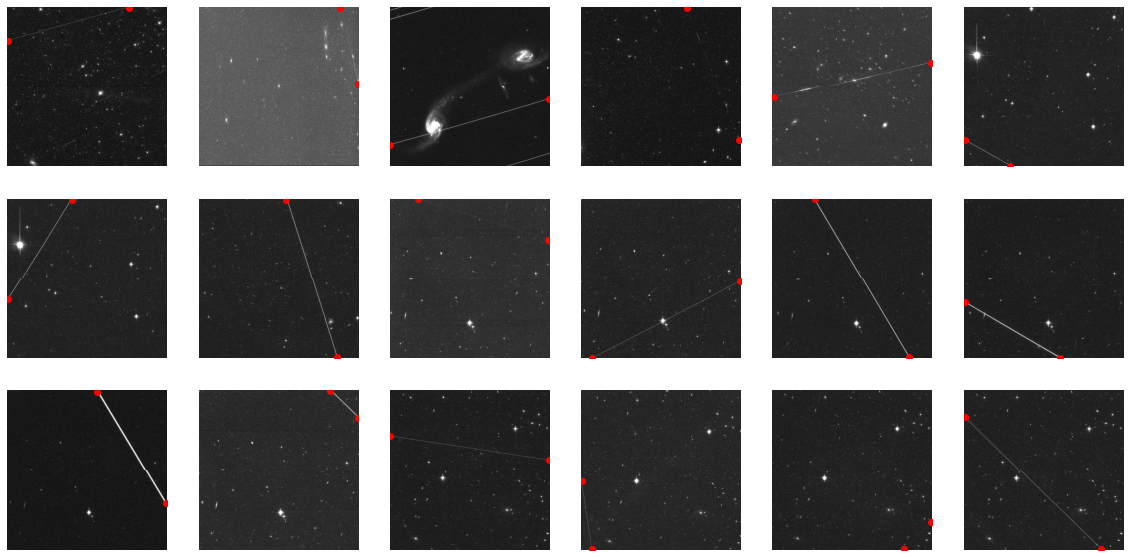

In [66]:
#Example Images
plt.figure(figsize=(20, 10))
path_images = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/Images/Visible/satellite/"
start_index = 551 #Random start number
for i in range(start_index,start_index + 18):
    try:
        ax = plt.subplot(3, 6, i - start_index + 1)
        image_path = path_images + satellite_filenames[i]
        image = Image.open(image_path)
        plt.imshow(image,cmap="gray")
        plt.scatter(satellite_points[i][0][0],satellite_points[i][0][1],color="red")
        plt.axis("off")
    except:
        continue

In [67]:
#Mark of second trail if there is a satellite
indices_t4 = data_points.index[data_points["task"] == "T4"].tolist()
print(len(indices_t4),"files.")
satellite_filenames_2, satellite_points_2 = get_points(indices_t4,data_points,"T4")

print(len(satellite_filenames_2),"marked second satellite trail.")
for i in range(len(satellite_filenames_2)):
    try:
        #Add point to previously annotated image (additional points)
        index = satellite_filenames.index(satellite_filenames_2[i])
        satellite_points[index].append(satellite_points_2[i][0])
    except:
        #Add as new file/image (new points)
        satellite_filenames.append(satellite_filenames_2[i])
        satellite_points.append(satellite_points_2[i])
print(satellite_filenames_2)
print(satellite_points_2)

11595 files.
144 marked second satellite trail.
['ie4i01010_ie4i01ugq.jpg', 'ieea05020_ieea05cbq.jpg', 'iedh49010_iedh49kuq.jpg', 'ie4n06040_ie4n06pqq.jpg', 'ie4n87030_ie4n87ekq.jpg', 'ie4n45040_ie4n45ndq.jpg', 'ie2y02030_ie2y02xjq.jpg', 'ie4m46020_ie4m46dmq.jpg', 'ie4m29020_ie4m29y6q.jpg', 'idq23h010_idq23hmlq.jpg', 'idq26m010_idq26mdqq.jpg', 'icwk03040_icwk03keq.jpg', 'ic8h13040_ic8h13siq.jpg', 'ic8h01040_ic8h01fvq.jpg', 'icbr04040_icbr04wcq.jpg', 'icb150090_icb150feq.jpg', 'icdxbn010_icdxbnqmq.jpg', 'ibyq08030_ibyq08d3q.jpg', 'ibs321010_ibs321ffq.jpg', 'ibp701030_ibp701peq.jpg', 'jeex01020_jeex01xaq.jpg', 'jdrz5e010_jdrz5eo7q.jpg', 'je4m31010_je4m31yxq.jpg', 'jdxf39010_jdxf39k6q.jpg', 'jdxf49010_jdxf49evq.jpg', 'jdz502020_jdz502j3q.jpg', 'jdxr03010_jdxr03vjq.jpg', 'jds45j010_jds45jqyq.jpg', 'jdl340010_jdl340jfq.jpg', 'jdxr08010_jdxr08baq.jpg', 'jdhd07010_jdhd07nmq.jpg', 'jdm96n020_jdm96ntrq.jpg', 'jd9y07010_jd9y07c3q.jpg', 'jd9y15010_jd9y15arq.jpg', 'jdkq02010_jdkq02clq.jpg', 'jdia0

In [68]:
#Mark of third trail if there is a satellite
indices_t7 = data_points.index[data_points["task"] == "T7"].tolist()
print(len(indices_t7),"files.")
satellite_filenames_3, satellite_points_3 = get_points(indices_t7,data_points,"T7")

print(len(satellite_filenames_3),"marked third satellite trail.")
for i in range(len(satellite_filenames_3)):
    try:
        #Add point to previously annotated image (additional points)
        index = satellite_filenames.index(satellite_filenames_3[i])
        satellite_points[index].append(satellite_points_3[i][0])
    except:
        #Add as new file/image (new points)
        satellite_filenames.append(satellite_filenames_3[i])
        satellite_points.append(satellite_points_3[i])
print(satellite_filenames_3)
print(satellite_points_3)

11595 files.
9 marked third satellite trail.
['jdrz67010_jdrz67meq.jpg', 'jeex01020_jeex01xaq.jpg', 'jcw501010_jcw501n2q.jpg', 'jbyi02010_jbyi02stq.jpg', 'jbrg22010_jbrg22bcq.jpg', 'jb6101010_jb6101nuq.jpg', 'jbew97010_jbew97mtq.jpg', 'j8xi1b010_j8xi1bafq.jpg', 'j8qh01010_j8qh01fpq.jpg']
[[[[1, 168], [49, 1]]], [[[567, 599], [598, 530]]], [[[2, 597], [313, 57]]], [[[2, 509], [398, 598]]], [[[47, 1], [599, 559]]], [[[280, 3], [596, 433]]], [[[2, 52], [547, 597]]], [[[3, 221], [323, 597]]], [[[350, 586], [3, 299]]]]


In [69]:
#Mark of fourth trail if there is a satellite
indices_t10 = data_points.index[data_points["task"] == "T10"].tolist()
print(len(indices_t10),"files.")
satellite_filenames_4, satellite_points_4 = get_points(indices_t10,data_points,"T10")

print(len(satellite_filenames_4),"marked fourth satellite trail.")
for i in range(len(satellite_filenames_4)):
    try:
        #Add point to previously annotated image (additional points)
        index = satellite_filenames.index(satellite_filenames_4[i])
        satellite_points[index].append(satellite_points_4[i][0])
    except:
        #Add as new file/image (new points)
        satellite_filenames.append(satellite_filenames_4[i])
        satellite_points.append(satellite_points_4[i])
print(satellite_filenames_4)
print(satellite_points_4)

11595 files.
1 marked third satellite trail.
['jdrz67010_jdrz67meq.jpg']
[[[[2, 448], [16, 596]]]]


1704


(-0.5, 599.5, 599.5, -0.5)

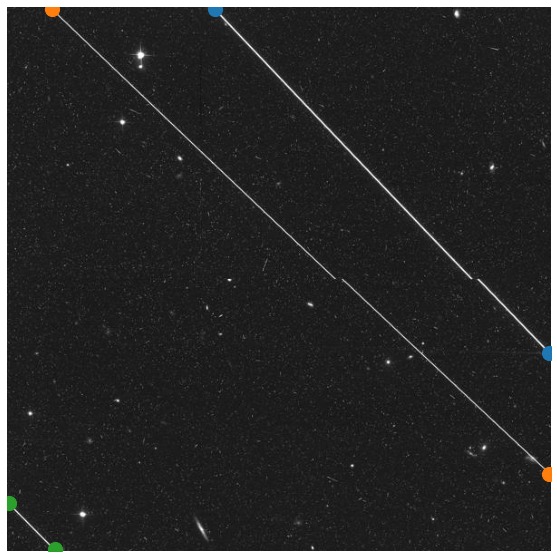

In [70]:
name = satellite_filenames_3[6]
image_path = path_images + name
image = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image,cmap="gray")
index = satellite_filenames.index(name)
print(index)
for i in range(len(satellite_points[index])):
    plt.scatter(satellite_points[index][i][0],satellite_points[index][i][1],s=200)
plt.axis("off")

### Copying

In [29]:
path_from = "/content/drive/MyDrive/ESA/Data/Hubble_Images/Raw/"
path_to = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/MRCNN/Images/"

#Copy images in MRCNN Folder
for i in tqdm(range(len(satellite_filenames))):
    instrument = get_instrument_name(satellite_filenames[i])
    from_folder, to_folder = copy_pathes(instrument)
    try:
        copyfile(path_from+from_folder+satellite_filenames[i],path_to+to_folder+"train/"+satellite_filenames[i])
    except:
        print("Copy Error.")

  0%|          | 1/2844 [02:00<94:55:34, 120.20s/it]

Copy Error.


  0%|          | 2/2844 [05:01<123:22:22, 156.28s/it]

Copy Error.


 60%|██████    | 1710/2844 [28:09<21:05,  1.12s/it]

Copy Error.


100%|██████████| 2844/2844 [56:52<00:00,  1.20s/it]


In [75]:
#Visible
dir = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/MRCNN/Images/Visible/train/"
images = glob.glob(dir+"*.jpg")      
print(len(images),"Images in folder Visible")
#Copy 20% into val directory
thresh = int(len(images)*0.2)
print("Threshold:",thresh)
for i in tqdm(range(0,thresh)):
    try:
        copyfile(images[i],images[i].replace("train","val"))
        os.remove(images[i])
    except:
        print("Copy or delete Error!")

#IR
dir = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/MRCNN/Images/IR/train/"
images = glob.glob(dir+"*.jpg")      
print(len(images),"Images in folder IR")
#Copy 20% into val directory
thresh = int(len(images)*0.2)
print("Threshold:",thresh)
for i in tqdm(range(0,thresh)):
    try:
        copyfile(images[i],images[i].replace("train","val"))
        os.remove(images[i])
    except:
        print("Copy or delete Error!")

2601 Images in folder Visible
Threshold: 520


100%|██████████| 520/520 [00:06<00:00, 85.72it/s]


221 Images in folder IR
Threshold: 44


100%|██████████| 44/44 [00:00<00:00, 76.74it/s]


In [76]:
dir = "/content/drive/MyDrive/ESA/Data/Zooniverse_Data/MRCNN/Images/Visible/train/"
images = glob.glob(dir+"*") 
print(len(images),"images now.")

2081 images now.


### Other help functions

In [ ]:
def calculate_mean_points(point_list,cluster_labels):
    """ Calculates the mean values of the given point list.
        The cluster_labels array gives the list of points
        belonging together.
    """
    points = [] #Resulting points
    #Save all point belongig together in a dictionary with same key
    point_dict = dict(zip(cluster_labels, point_list))
    point_dict = {key: [] for key in cluster_labels}
    for k, v in zip(cluster_labels, point_list):
        point_dict[k].append(v)
    #Calculate mean values for each point, round and save as integer
    for j in point_dict:
        points.append(int(np.mean(point_dict[j])))
    return points

In [ ]:
def calculate_mean_points_limit(point_list,pixel_limit):
    """ Calculates the mean values of the given point list.
        The pixel_limit gives the minimum distance from an existing point
        to be characterized as a new point.
    """
    points = [] #Resulting points
    for j in range(len(point_list)):
        point = [] #All points belonging together
        new_point = False
        #Check if new point (first one is always a new point)
        if j != 0:
            for k in range(len(points)):
                if np.abs(points[k]-point_list[j])<pixel_limit:
                    new_point = False
                    break
                else:
                    new_point = True
        else:
            new_point = True
        #If new point calculate mean value
        if new_point:
            point.append(point_list[j])
            for k in range(j+1,len(point_list)):
                if np.abs(point_list[k]-point_list[j])<pixel_limit:
                    point.append(point_list[k])
            points.append(int(np.round(np.mean(point))))
    return points